# Homework - Stage 1

##  Byte Benders - TIM 7

Alvin Arianda

Cut Sari Natasya

Dwi Damara Kartikasari

Limatan Luviar

Muhammad Hadi Dermawan

Nofri Rhamawati

Sulami Hauzana Assyifa

# Descripton and Background Data

- **Context**
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

- **Content**
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.
- Most important features that have an impact on Product taken: Designation, Passport, Tier City, Martial status, occupation
- Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
- Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.

- **Inspiration**
We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

- **Tasks to Solve** :
- To predict which customer is more likely to purchase the newly introduced travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.

**About this file** 

"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

1. CustomerID
Unique customer ID
2. ProdTaken
Unique customer ID
3. Age
Age of customer
4. TypeofContact
How customer was contacted (Company Invited or Self Inquiry)
5. CityTier
City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. DurationOfPitch
Duration of the pitch by a salesperson to the customer
7. Occupation
Occupation of customer
8. Gender
Gender of customer
9. NumberOfPersonVisiting
Total number of persons planning to take the trip with the customer
10. NumberOfFollowups
Total number of follow-ups has been done by the salesperson after the sales pitch
11. ProductPitched
Product pitched by the salesperson
12. PreferredPropertyStar
Preferred hotel property rating by customer
13. MaritalStatus
Marital status of customer
14. NumberOfTrips
Average number of trips in a year by customer
15. Passport
The customer has a passport or not (0: No, 1: Yes)
16. PitchSatisfactionScore
Sales pitch satisfaction score
17. OwnCar
Whether the customers own a car or not (0: No, 1: Yes)
18. NumberOfChildrenVisiting
Total number of children with age less than 5 planning to take the trip with the customer
19. Designation
Designation of the customer in the current organization
20. MonthlyIncome
Gross monthly income of the customer

# Load And Describe Data

In [158]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [159]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [160]:
df = pd.read_csv('Travel.csv')

In [161]:
df.shape

(4888, 20)

In [162]:
df.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3024,203024,0,36.0,Self Enquiry,3,15.0,Salaried,Female,4,4.0,Basic,3.0,Divorced,3.0,0,3,0,1.0,Executive,21250.0
3442,203442,0,27.0,Self Enquiry,1,9.0,Small Business,Male,3,5.0,Basic,3.0,Unmarried,2.0,0,3,0,1.0,Executive,22582.0
1324,201324,0,29.0,Self Enquiry,1,35.0,Salaried,Male,3,5.0,Deluxe,3.0,Married,1.0,0,5,1,2.0,Manager,21384.0
3408,203408,0,35.0,Self Enquiry,3,22.0,Small Business,Fe Male,4,4.0,Deluxe,5.0,Unmarried,3.0,0,1,1,3.0,Manager,24803.0
2309,202309,0,42.0,Self Enquiry,3,10.0,Small Business,Male,2,3.0,Deluxe,5.0,Single,1.0,0,5,1,0.0,Manager,20155.0


# Descriptive Statistics

### Cek tipe data

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Describe

In [164]:
df.select_dtypes(include='number').describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [165]:
df.select_dtypes(exclude='number').describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [166]:
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

- A. Semua tipe data sudah sesuai
- B. Nilai kosong pada kolom Age, TypeOfContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar,  NumberOfTrips, NumberOfChildrenVisiting, dan MonthlyIncome
- C. NumberOfPersonVisiting, NumberOfFollowups, PreferredPropertyStar, dan MonthlyIncome memiliki perbedaan nilai mean dan median yang cukup tinggi dan pada Gender terdapat 3 unique value

# Explatory Data Analysis

In [167]:
# df_raw = df.copy()

### Kategorikal dan Numerikal

In [168]:
nums = df.select_dtypes(exclude='object').columns.tolist()
cats = df.select_dtypes(include='object').columns.tolist()

In [169]:
df[nums].describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [171]:
df[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


## Univariate Analysis

### Numerikal

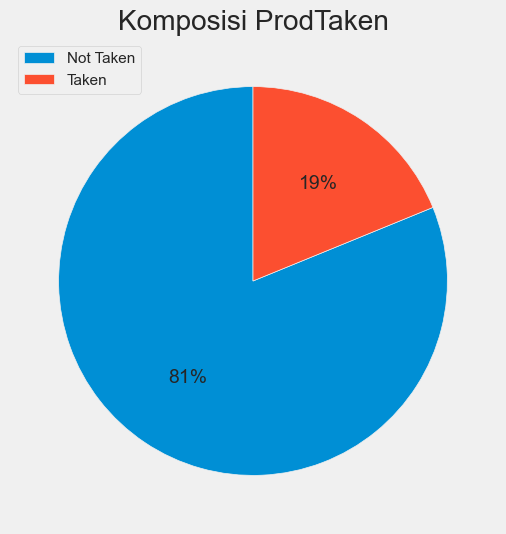

In [172]:
plt.figure(figsize=(6, 6))
target_counts = df['ProdTaken'].value_counts()
plt.pie(target_counts, autopct='%1.0f%%', startangle=90)
plt.title('Komposisi ProdTaken')
plt.legend(labels=['Not Taken', 'Taken'], loc='upper left')

plt.show()

In [173]:
target_pt = (df[['ProdTaken']]
            .groupby('ProdTaken')
            .agg(Count=('ProdTaken','count'))
            .sort_values(by=["Count"], ascending=False)
            .reset_index()
            )
target_pt

,ProdTaken,Count
0,0,3968
1,1,920


In [174]:
# Menghitung nilai terhadap 'ProdTaken' dan mengubah indeks
df_raw_index = df['ProdTaken'].value_counts(normalize=True) * 100
df_raw_index = df_raw_index.reset_index()
df_raw_index['index'] = df_raw_index['index'].map({0: 'Not taken', 1: 'Taken'})
df_raw_index = df_raw_index.set_index('index')
df_raw_index

,ProdTaken
index,
Not taken,81.178396
Taken,18.821604


Terdapat sekitar 81.18% yang tidak mengambil Wellness Tourism Package yang setara dengan 3968 Customer dengan ProdTaken = 0. sementara hanya 18.82% pelanggan yang mengambil Wellness Tourism Package yang setara dengan 920 Customer dengan ProdTaken = 1. ini mengindikasikan bahwa Wellness Tourism Package kurang diminati oleh customer.

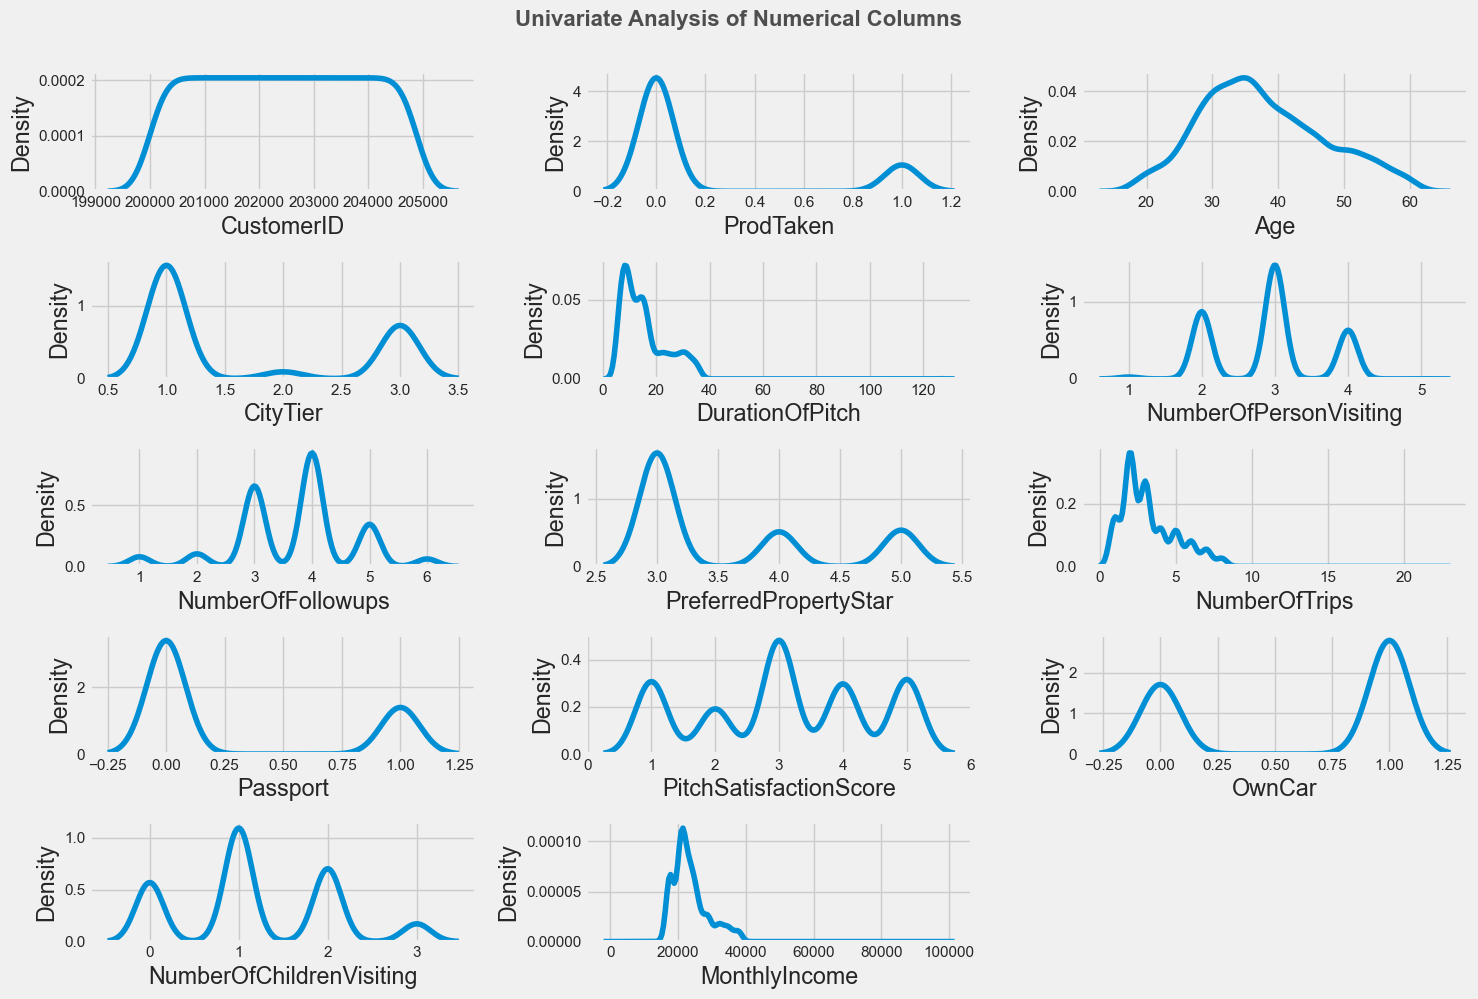

In [175]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(nums)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[nums[i]])
    plt.xlabel(nums[i])
    plt.tight_layout()
   
# save plot
plt.show()

Kesimpulan:

Kolom CustomerID memiliki terlalu banyak data yang tersebar, mungkin karena pelanggan di setiap baris selalu unik, sehingga kolom tersebut nantinya dapat dihapus.
Kolom Age tampaknya berdistribusi normal.
Kolom DurationOfPitch, NumberOfTrips, dan MonthlyIncome tampaknya memiliki distribusi data yang condong positif (condong ke kanan), yang menunjukkan adanya outlier.
Kolom lain dapat diabaikan karena sebenarnya merupakan tipe data diskrit atau ordinal.

### Kategorikal

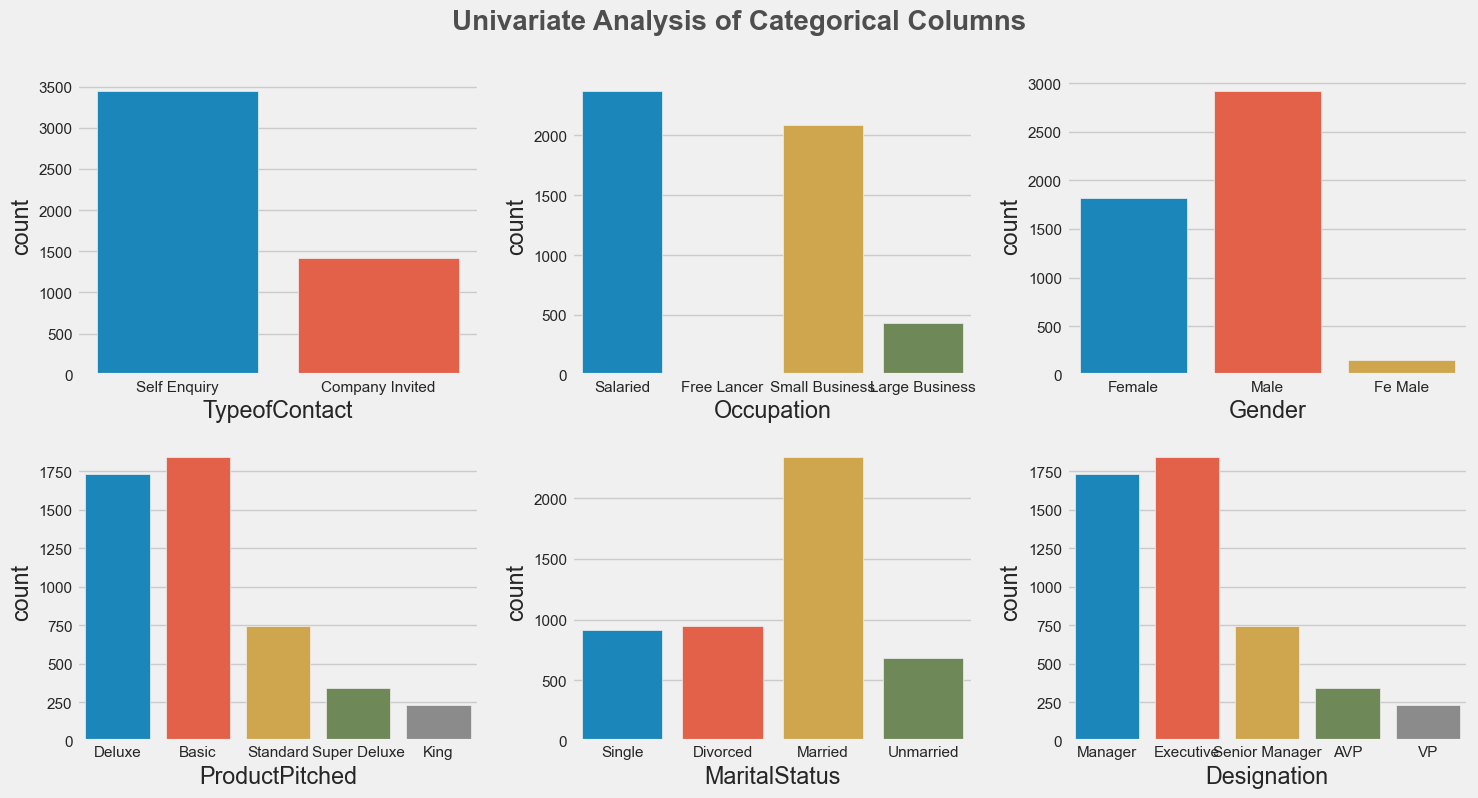

In [176]:
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cats[i]])

plt.tight_layout()
plt.show()

Kesimpulan:

Lebih dari setengah data pada kolom TypeofContact berasal dari kategori Self Enquiry.
Kategori Salaried dan Small Business mendominasi kolom Occupation, namun jumlah Free Lancer terlalu sedikit untuk dipertimbangkan.
Jumlah individu dengan jenis kelamin laki-laki lebih banyak daripada perempuan pada kolom Gender. Perlu dilakukan perbaikan penulisan kategori Fe Male menjadi Female.
Dua kategori mendominasi kolom ProductPitched dan Designation.
Status Married mendominasi kolom MaritalStatus. Selain itu, status Single dan Unmarried dapat dianggap sama dan digabungkan

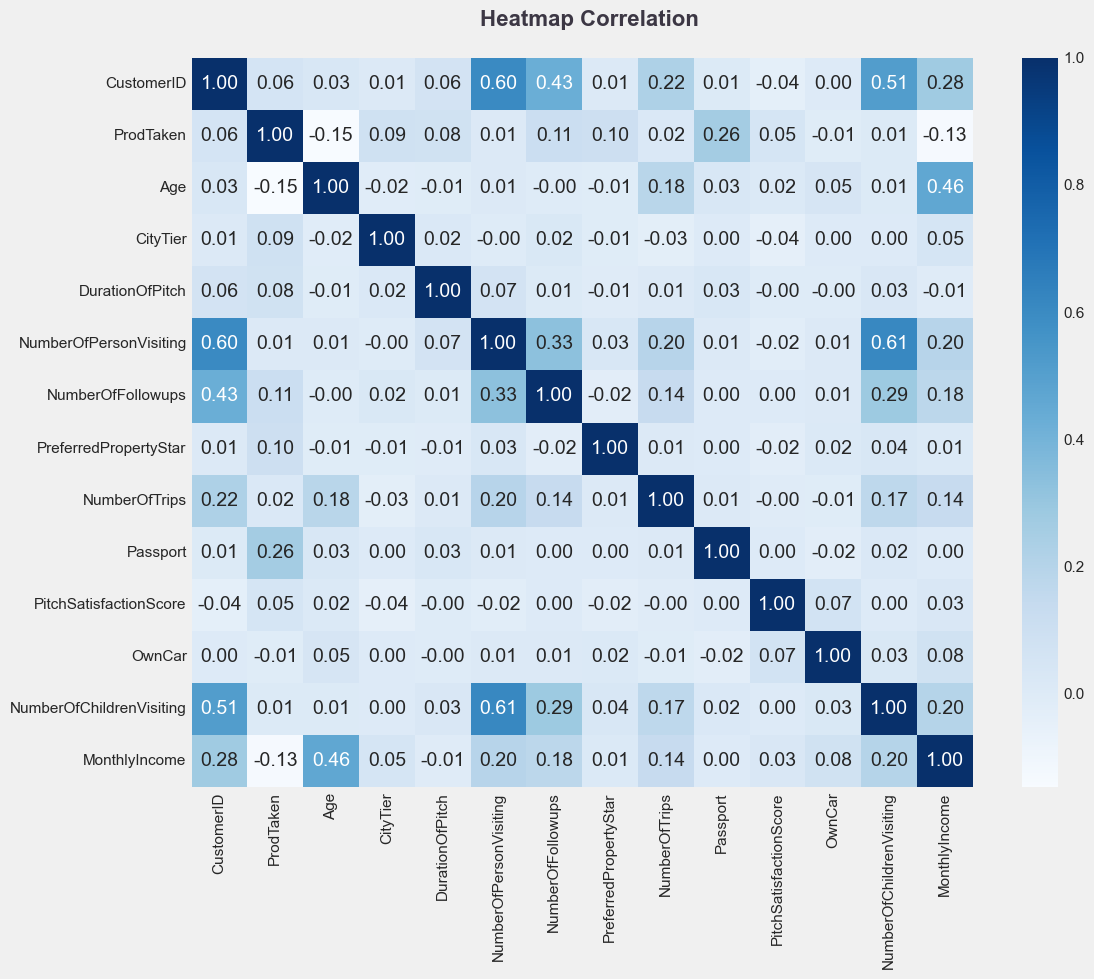

In [177]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [178]:
# Kesimpulan

## Bivariate Analysis

In [179]:
df_raw = df.copy()

In [180]:
df_raw['ProdTaken_YN'] = df_raw['ProdTaken'].apply(lambda x: 'Yes' if x == 1 else 'No')

### Cats Vs ProdTaken

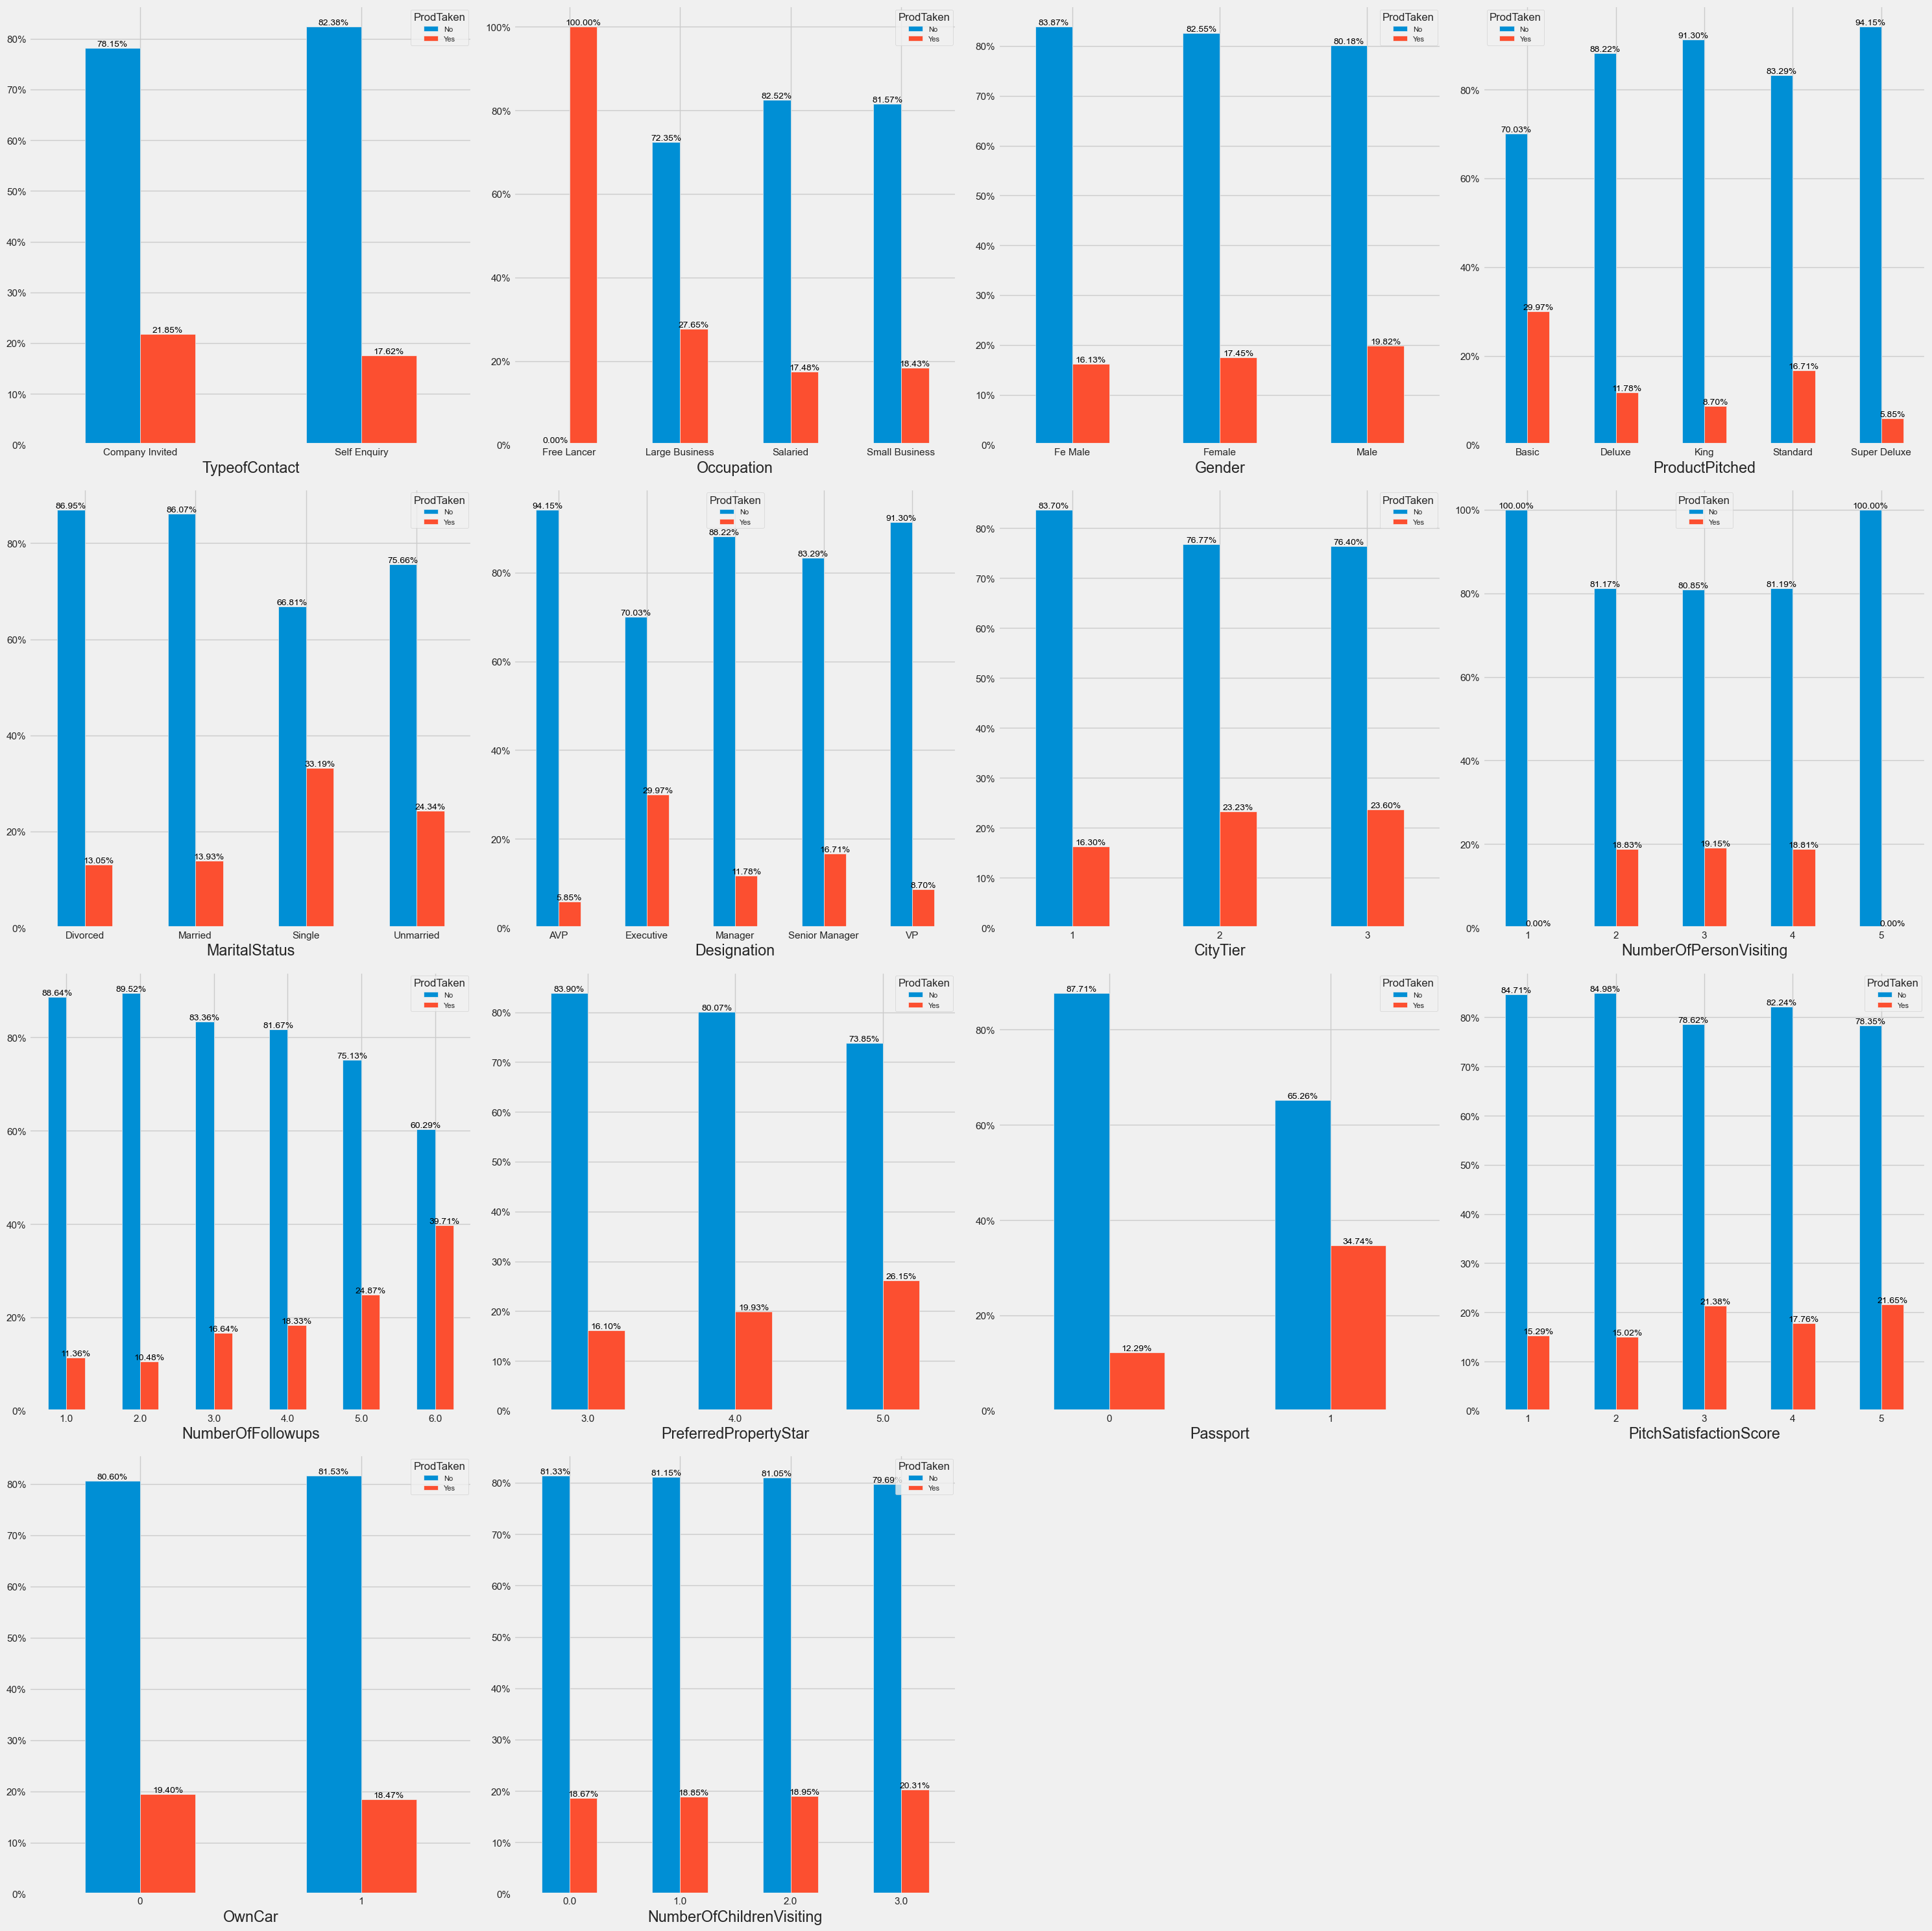

In [210]:
cats_2 = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
          'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
          'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']

# Menghitung proporsi nilai kolom 'ProdTaken_YN' untuk setiap kategori dalam setiap variabel
plt.figure(figsize=(30, 30))

# Menggunakan enumerate untuk mendapatkan nomor subplot dan nilai cat dari cats_2
for i, cat in enumerate(cats_2, 1):
    # Menampilkan subplot dalam grid 4x4
    plt.subplot(4, 4, i)
    data = df_raw.groupby(cat)['ProdTaken_YN'].value_counts(normalize=True).unstack('ProdTaken_YN')
    ax = data.plot(kind='bar', ax=plt.gca()) 
    
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.xlabel(cat)
    plt.legend(title="ProdTaken",prop={'size': 8})
    
    # Menambahkan label persentase di atas setiap bar
    for i, bar in enumerate(ax.patches):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height,
            f'{height:.2%}',
            ha='center', va='bottom', color='black', fontsize=10
        )
    
    plt.xticks(rotation=0)

plt.tight_layout() 
plt.show()

In [212]:
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_raw['ProdTaken'] = le.fit_transform(df_raw['ProdTaken'])

# Fitur kategorikal yang ingin dianalisis
categorical_features = cats_2

# Melakukan uji ANOVA untuk setiap fitur kategorikal terhadap target variabel
for feature in categorical_features:
    categories = df_raw[feature].unique()
    anova_results = []
    for category in categories:
        group = df_raw[df_cast[feature] == category]['ProdTaken']
        anova_results.append(group)
    f_statistic, p_value = f_oneway(*anova_results)
    
    print(f'Feature: {feature}')
    print(f'F-statistic: {f_statistic}, p-value: {p_value}')
    if p_value < 0.05:  # Misalkan ambang batas signifikansi alpha adalah 0.05
        print("Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'")
    else:
        print("Tidak cukup bukti untuk menolak hipotesis nol")
    print('-' * 50)

Feature: TypeofContact
F-statistic: nan, p-value: nan
Tidak cukup bukti untuk menolak hipotesis nol
--------------------------------------------------
Feature: Occupation
F-statistic: 11.320239710315109, p-value: 2.1344995138241134e-07
Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'
--------------------------------------------------
Feature: Gender
F-statistic: 2.447670892554244, p-value: 0.08660088146185731
Tidak cukup bukti untuk menolak hipotesis nol
--------------------------------------------------
Feature: ProductPitched
F-statistic: 68.93647298369976, p-value: 7.431320445187474e-57
Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'
--------------------------------------------------
Feature: MaritalStatus
F-statistic: 67.51519835181304, p-value: 8.992872911727544e-43
Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'
--------------------------------------------------
Feature: Designation
F-statistic: 68.93647298369

Dari hasil uji ANOVA, fitur-fitur seperti CityTier, Occupation, ProductPitched, MaritalStatus, Passport, dan Designation menunjukkan perbedaan yang signifikan antara grup kategorikal terhadap target 'ProdTaken'. Sementara itu, fitur-fitur lainnya seperti TypeofContact, Gender, OwnCar, dan NumberOfChildrenVisiting tidak menunjukkan perbedaan yang signifikan antara grup kategorikal terhadap target 'ProdTaken'

### Nums Vs ProdTaken

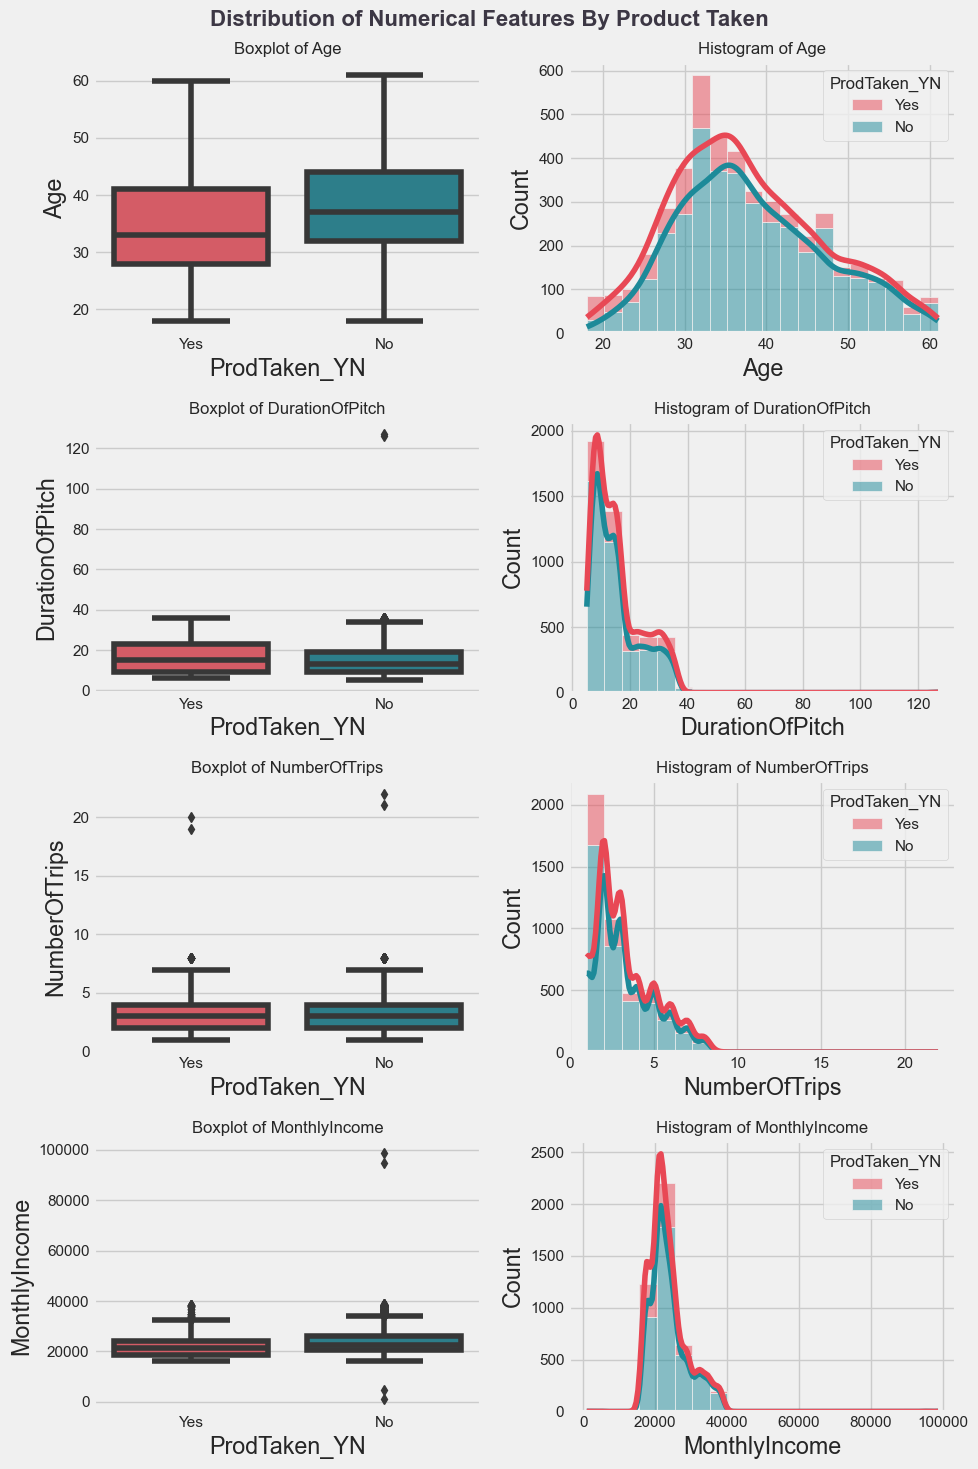

In [198]:
nums_2 = ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
clr1 = ['#E84855', '#1D8A99']
fig, ax = plt.subplots(4, 2, figsize=(10,15))
fig.suptitle('Distribution of Numerical Features By Product Taken', color='#3C3744',
             fontsize=16, fontweight='bold', ha='center')
for i, col in enumerate(nums_2):   
    sns.boxplot(data=df_raw, x='ProdTaken_YN', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df_raw, x=col, hue='ProdTaken_YN', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=12)
fig.tight_layout()

In [199]:
# Menghitung korelasi antara fitur numerik dan target 'ProdTaken'
correlations = df_raw[nums_2].apply(lambda x: x.corr(df_raw['ProdTaken']))
print(correlations)

Age               -0.147254
DurationOfPitch    0.078257
NumberOfTrips      0.018898
MonthlyIncome     -0.130585
dtype: float64


Kesimpulan

Age: Korelasi negatif menunjukkan bahwa semakin tua usia, kemungkinan pengambilan produk cenderung lebih rendah.

DurationOfPitch: Korelasi positif yang lemah menunjukkan hubungan sedikit lebih kuat dengan kemungkinan pengambilan produk.

NumberOfPersonVisiting dan NumberOfTrips: Keduanya menunjukkan korelasi rendah dengan 'ProdTaken', menunjukkan bahwa jumlah orang yang mengunjungi atau jumlah perjalanan tidak memiliki pengaruh yang signifikan terhadap kemungkinan pengambilan produk.

NumberOfFollowups dan PreferredPropertyStar: Keduanya menunjukkan korelasi positif dengan 'ProdTaken', menunjukkan bahwa jumlah tindak lanjut dan preferensi terhadap bintang properti memiliki keterkaitan yang sedikit lebih tinggi dengan kemungkinan pengambilan produk.

PitchSatisfactionScore: Korelasi positif yang lemah menunjukkan bahwa kepuasan terhadap pitch (penawaran) juga sedikit berkorelasi dengan kemungkinan pengambilan produk.

Ini mengindikasikan bahwa fitur-fitur ini memiliki potensi untuk menjadi faktor-faktor penting dalam memprediksi kemungkinan pengambilan produk, namun analisis yang lebih mendalam diperlukan sebelum menarik kesimpulan akhir.

In [213]:
from scipy import stats

features = nums_2

for feature in features:
    prod_taken_0 = df_raw[df_cast['ProdTaken'] == 0][feature]
    prod_taken_1 = df_raw[df_cast['ProdTaken'] == 1][feature]
    
    t_stat, p_value = stats.ttest_ind(prod_taken_0.dropna(), prod_taken_1.dropna())
    
    print(f"Feature: {feature}")
    print(f"t-statistic: {t_stat}, p-value: {p_value}")
    if p_value < 0.05: 
        print("Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'")
    else:
        print("Tidak cukup bukti untuk menolak hipotesis nol")
    print("-" * 50)

Feature: Age
t-statistic: 10.162968672912964, p-value: 5.1550957936007864e-24
Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'
--------------------------------------------------
Feature: DurationOfPitch
t-statistic: -5.344213594222458, p-value: 9.516584004909209e-08
Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'
--------------------------------------------------
Feature: NumberOfTrips
t-statistic: -1.302105582812854, p-value: 0.19294348402445385
Tidak cukup bukti untuk menolak hipotesis nol
--------------------------------------------------
Feature: MonthlyIncome
t-statistic: 8.984507941073279, p-value: 3.705259842422149e-19
Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'
--------------------------------------------------


dari hasil uji t-test

Age: Terdapat perbedaan signifikan antara grup 'ProdTaken' berdasarkan fitur Age. Hal ini menunjukkan bahwa grup 'ProdTaken' menunjukkan variasi atau perbedaan yang signifikan berdasarkan rentang usia pelanggan.

DurationOfPitch: Terdapat perbedaan signifikan antara grup 'ProdTaken' berdasarkan DurationOfPitch. Artinya, panjang durasi saat melakukan pitch produk juga mempengaruhi 'ProdTaken'.

NumberOfPersonVisiting dan NumberOfTrips: Tidak terdapat cukup bukti statistik yang mendukung adanya perbedaan signifikan antara grup 'ProdTaken' dalam fitur-fitur ini. Ini menunjukkan bahwa jumlah orang yang berkunjung dan jumlah perjalanan tidak memiliki pengaruh yang signifikan terhadap 'ProdTaken'.

NumberOfFollowups dan PreferredPropertyStar: Terdapat perbedaan signifikan antara grup 'ProdTaken' berdasarkan NumberOfFollowups dan PreferredPropertyStar. Ini menunjukkan bahwa jumlah tindak lanjut (follow-up) dan preferensi bintang properti juga mempengaruhi 'ProdTaken'.

PitchSatisfactionScore: Terdapat perbedaan signifikan antara grup 'ProdTaken' berdasarkan PitchSatisfactionScore. Skor kepuasan terkait pitch produk mempengaruhi 'ProdTaken'.

MonthlyIncome: Terdapat perbedaan signifikan antara grup 'ProdTaken' berdasarkan MonthlyIncome. Hal ini menunjukkan bahwa pendapatan bulanan pelanggan juga memainkan peran dalam 'ProdTaken'.

## Multivariate Analysis

<Axes: xlabel='DurationOfPitch', ylabel='ProdTaken_YN'>

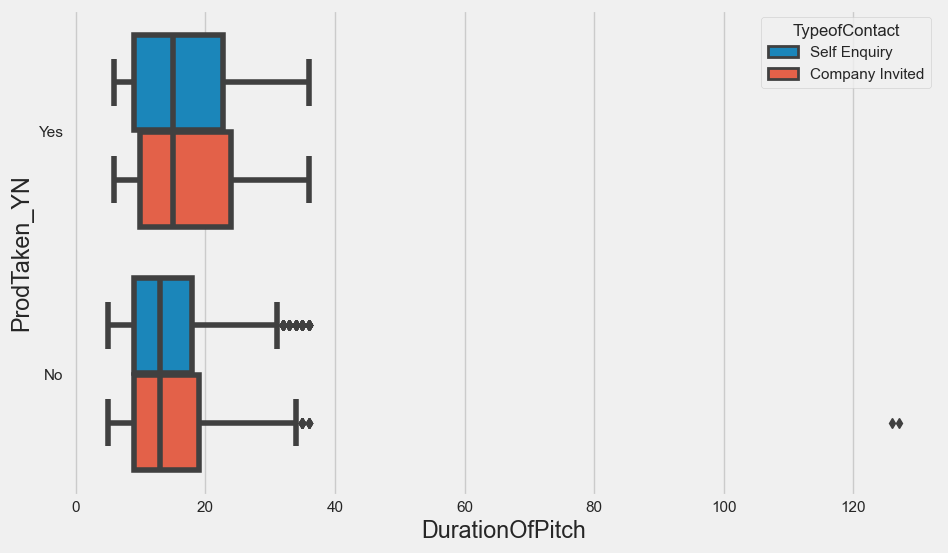

In [188]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_raw, x = 'DurationOfPitch', y = 'ProdTaken_YN', hue = 'TypeofContact')

<Axes: xlabel='PitchSatisfactionScore', ylabel='DurationOfPitch'>

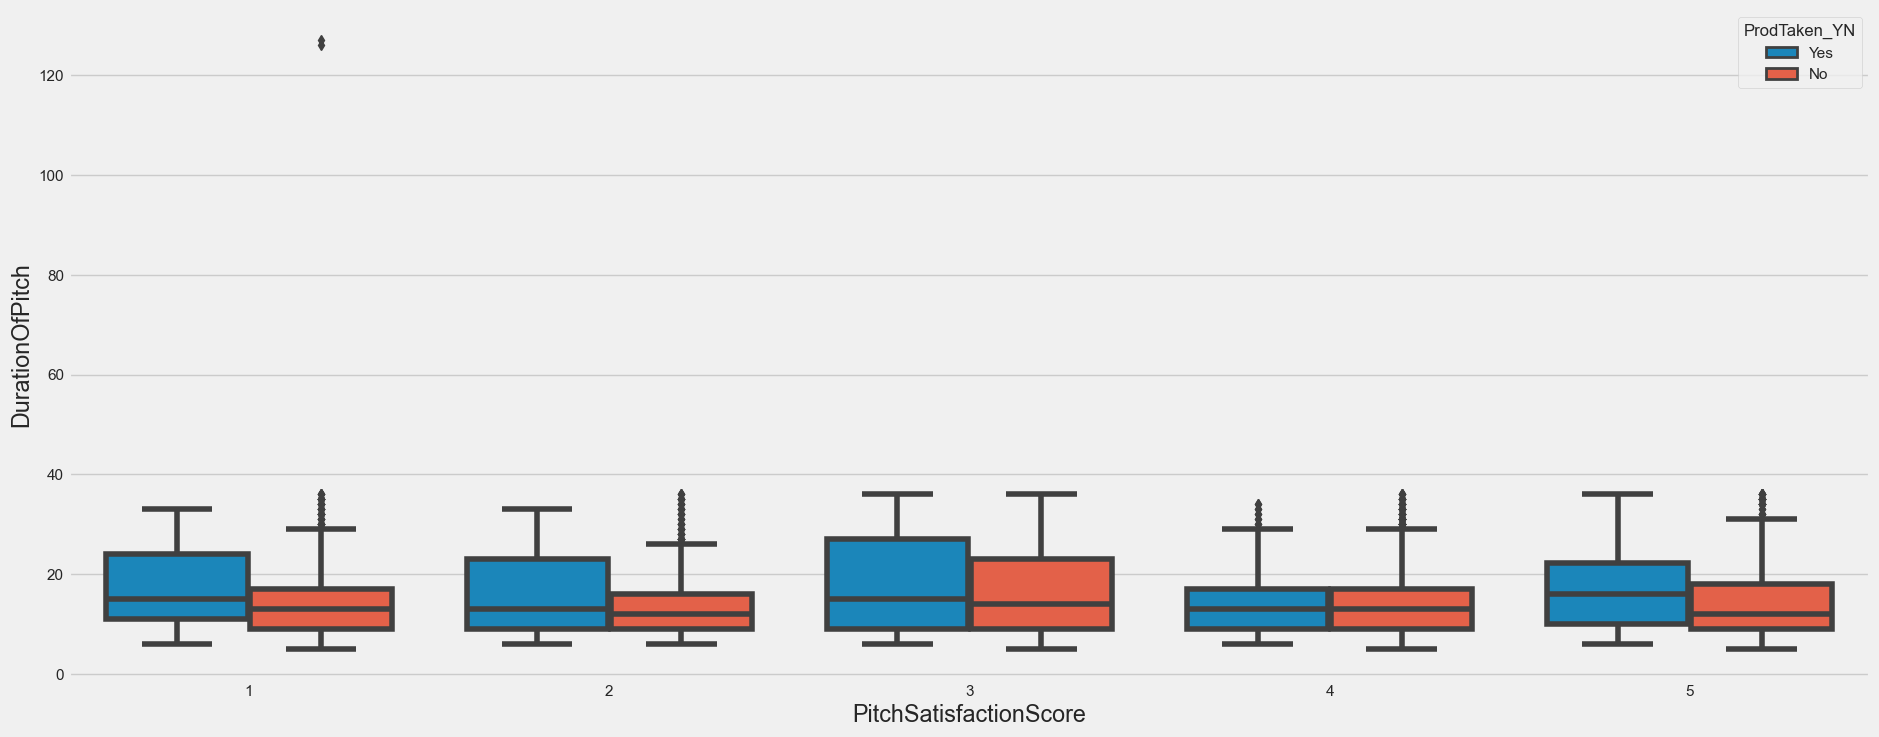

In [189]:
sns.boxplot(data=df_raw, x='PitchSatisfactionScore', y='DurationOfPitch', hue='ProdTaken_YN')

<Axes: xlabel='Designation', ylabel='DurationOfPitch'>

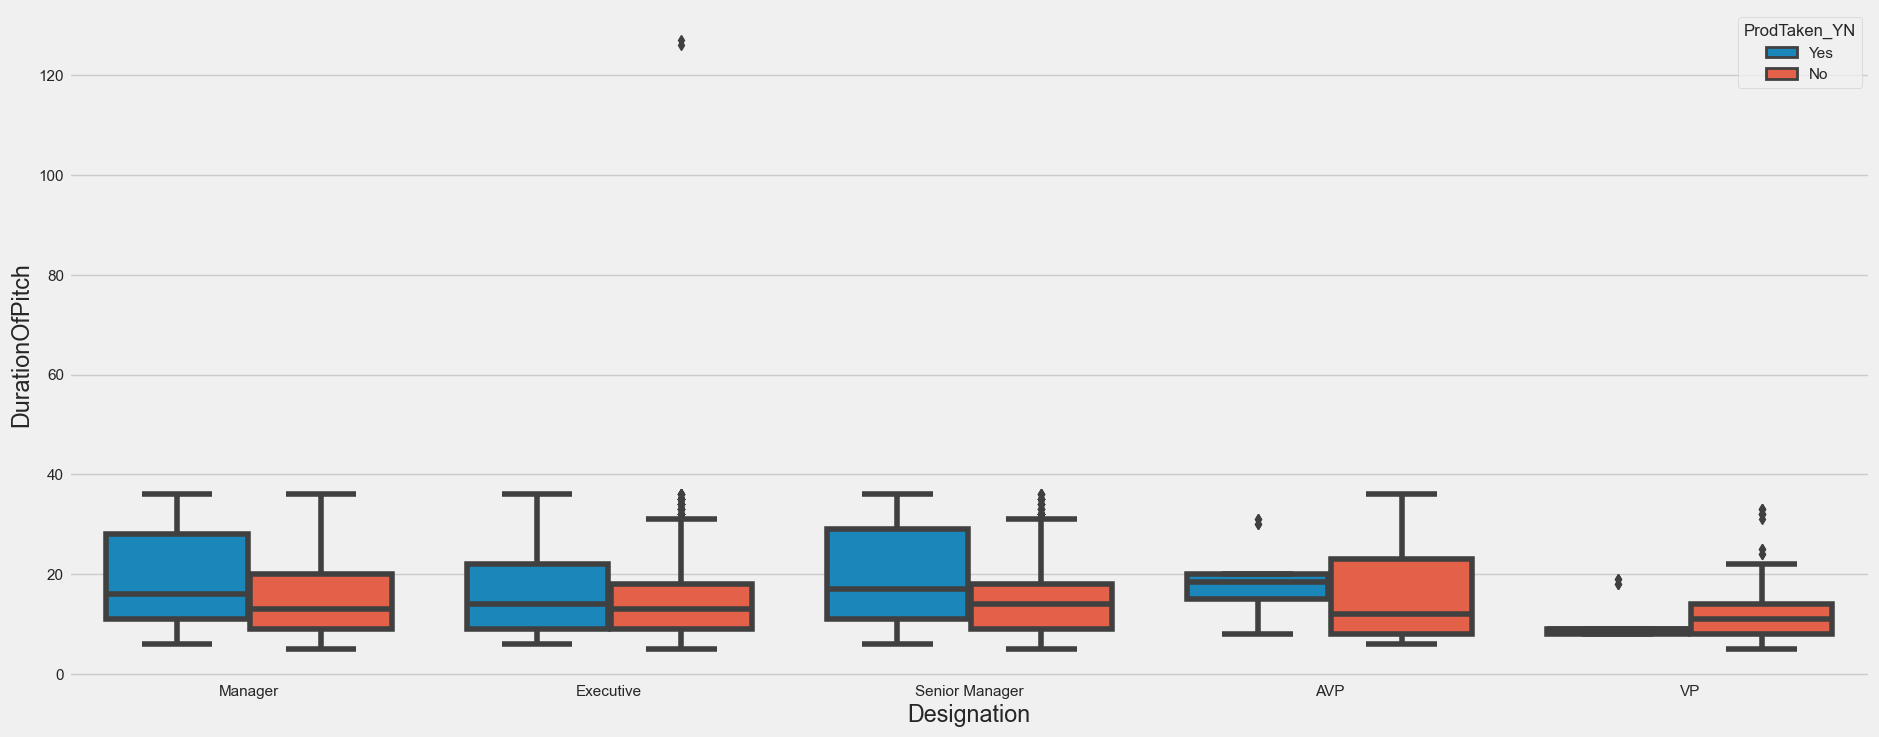

In [190]:
sns.boxplot(data=df_raw, x='Designation', y='DurationOfPitch', hue='ProdTaken_YN')

<Axes: xlabel='Passport', ylabel='MonthlyIncome'>

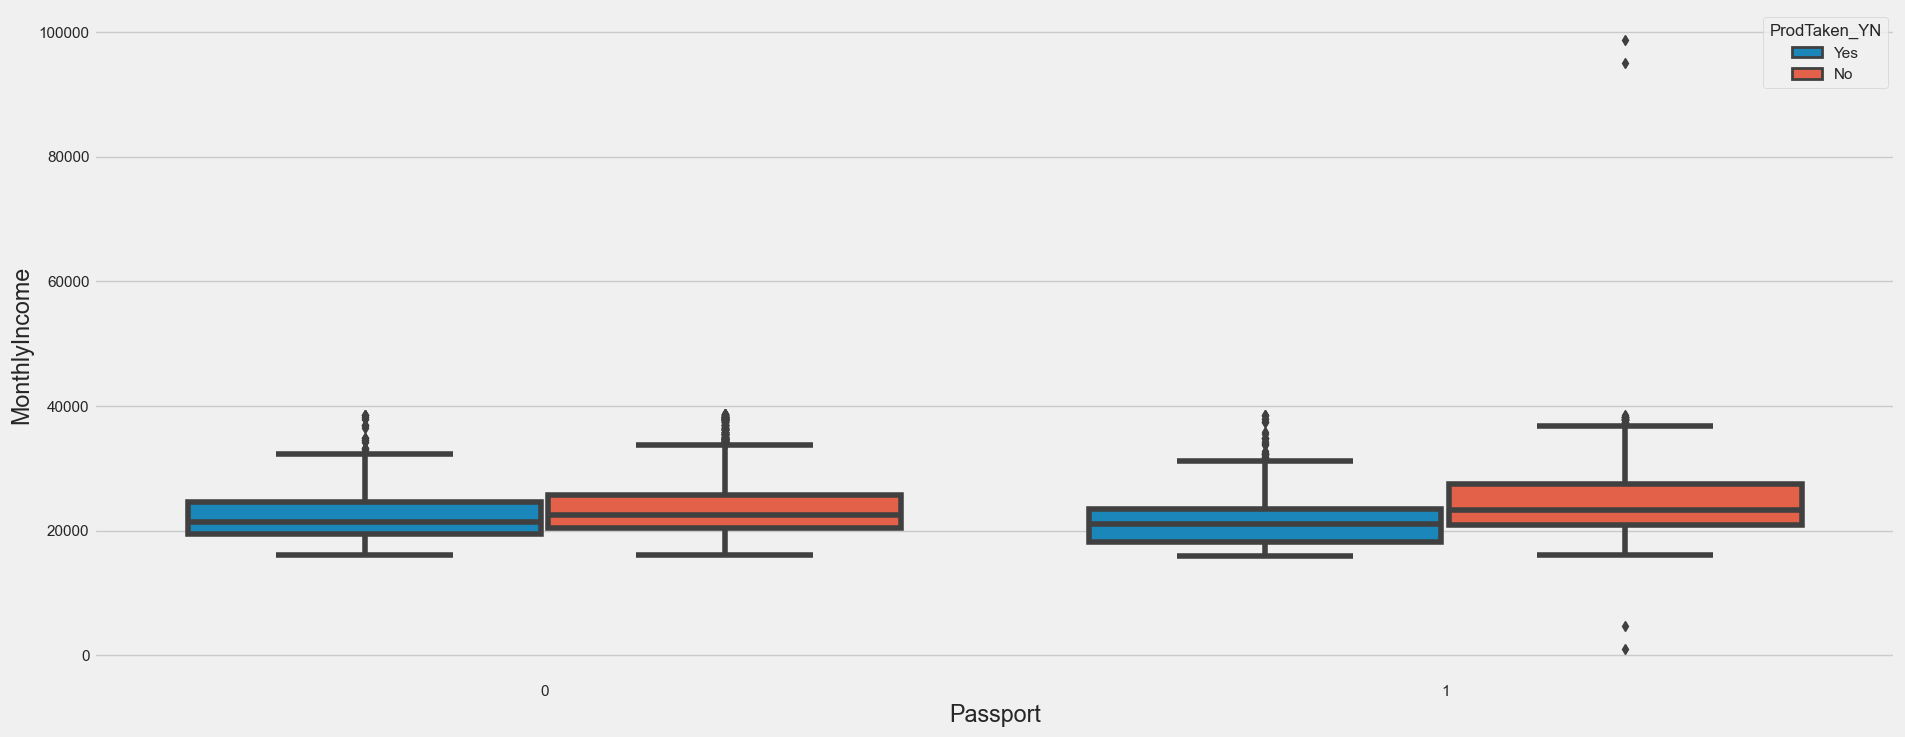

In [191]:
sns.boxplot(data=df_raw, x='Passport', y='MonthlyIncome', hue='ProdTaken_YN')

<Axes: xlabel='Designation', ylabel='DurationOfPitch'>

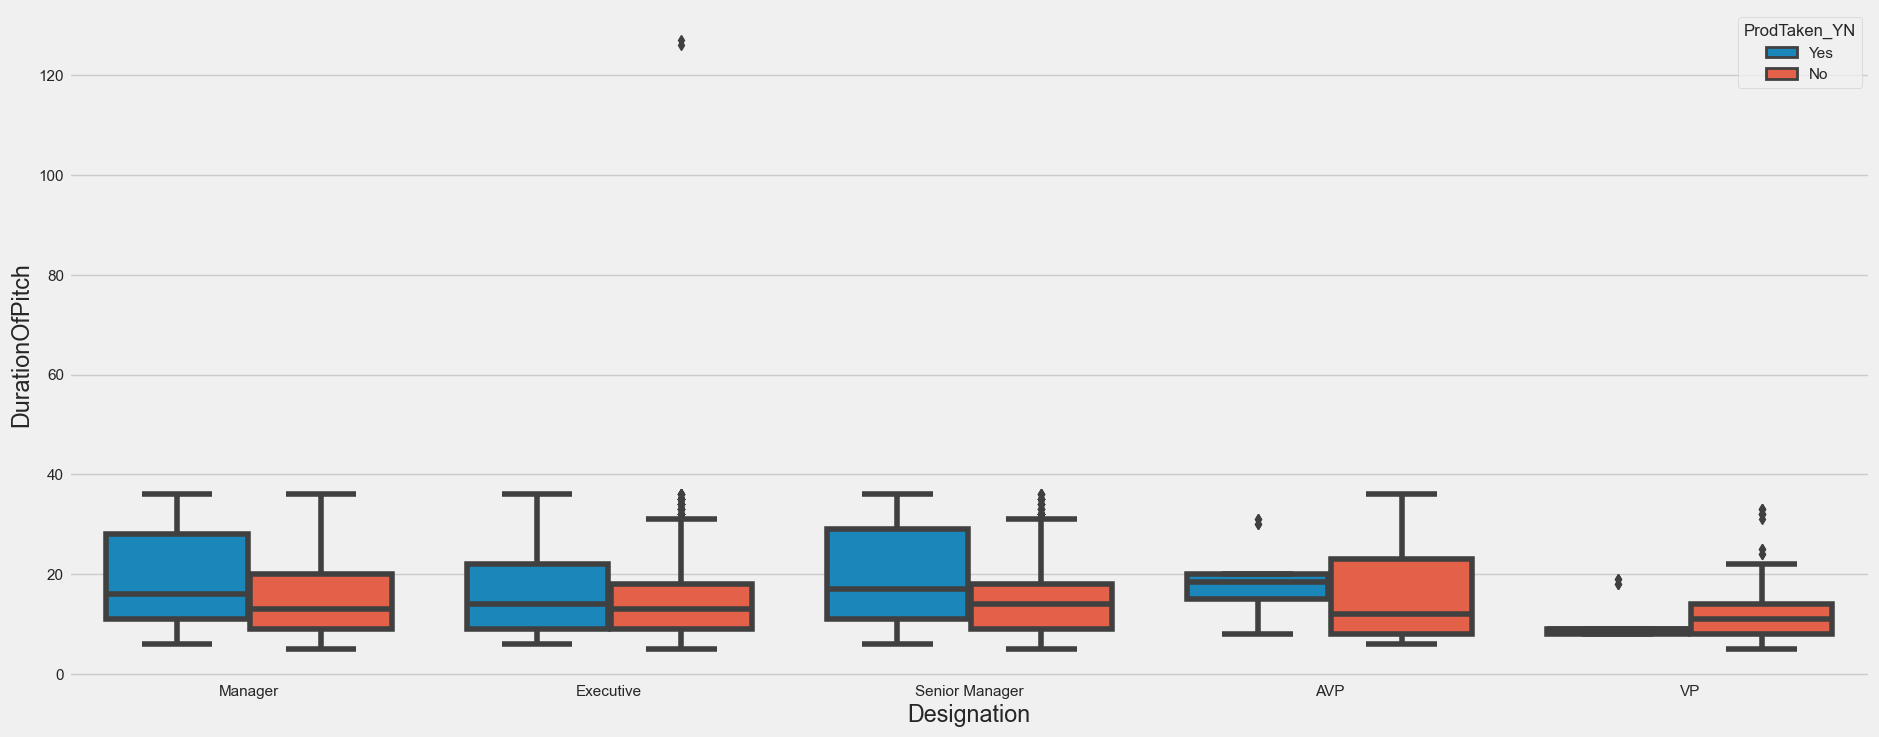

In [192]:
sns.boxplot(data=df_raw, x='Designation', y='DurationOfPitch', hue='ProdTaken_YN')